In [1]:
%matplotlib inline

from cosima_cookbook import build_index, get_nc_variable
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import dask.diagnostics

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:38716' processes=8 cores=8>


In [2]:
expts = ['mom025_nyf','mom025_nyf_salt','mom025_jra_ryf8485',
         'mom025_jra_ryf9091','mom025_jra_ryf0304','mom025_jra_ryf9091_saltunderice']

In [3]:
expt1=expts[0]
expt2=expts[1]
expt3=expts[2]
expt4=expts[3]

# Velocity vs Salinity vs Density

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yu_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 102 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


(-45, -30.023457876075213)

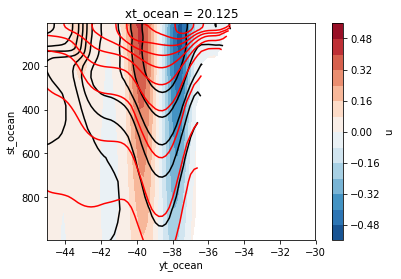

In [18]:
u1=get_nc_variable(expt1,'ocean.nc','u', time_units='days since 1900-01-01')
u_1 = u1.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yu_ocean=slice(-60,-30)).sel(xu_ocean=20)

rho1=get_nc_variable(expt1,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho2=get_nc_variable(expt2,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho3=get_nc_variable(expt3,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho4=get_nc_variable(expt4,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho_1 = rho1.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xt_ocean=1200)

salt1=get_nc_variable(expt1,'ocean.nc','salt', time_units='days since 1900-01-01')
salt_1 = salt1.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xt_ocean=1200)

u_1.plot.contourf(levels=15)
salt_1.plot.contour(levels=15,colors='k',linewidth=0.1)
rho_1.plot.contour(levels=15,colors='r',linewidth=0.1)
plt.gca().invert_yaxis()
plt.xlim(xmin=-45)

# Agulhas leakage distribution plot

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 102 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less
  if not reflexive


(1000, 0)

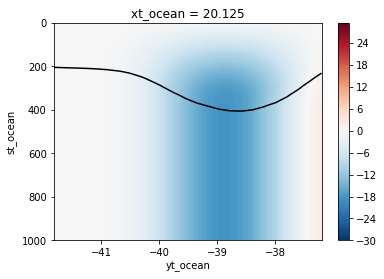

In [19]:
tx_trans1=get_nc_variable(expt1,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans2=get_nc_variable(expt2,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans3=get_nc_variable(expt3,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans4=get_nc_variable(expt4,'ocean.nc','tx_trans', time_units='days since 1900-01-01')

tx_trans_1 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()

salt_al_1 = salt1\
            .sel(yt_ocean=slice(-42, -37))\
            .sel(xt_ocean=20, method='nearest')\
            .isel(time=slice(None,100)).mean(dim='time')\
            .compute()
            
rho_al_1 = rho1\
            .sel(yt_ocean=slice(-42, -37))\
            .sel(xt_ocean=20, method='nearest')\
            .isel(time=slice(None,100)).mean(dim='time')\
            .compute()

mask = (rho_AL < 1026.5)
al_trans=(tx_trans_al_1 * mask *-1).cumsum('yt_ocean').cumsum('st_ocean')
al_trans.plot.contourf(levels=np.arange(-30, 30, 0.5))
rho_AL.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

# Time series of Agulhas Leakage

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


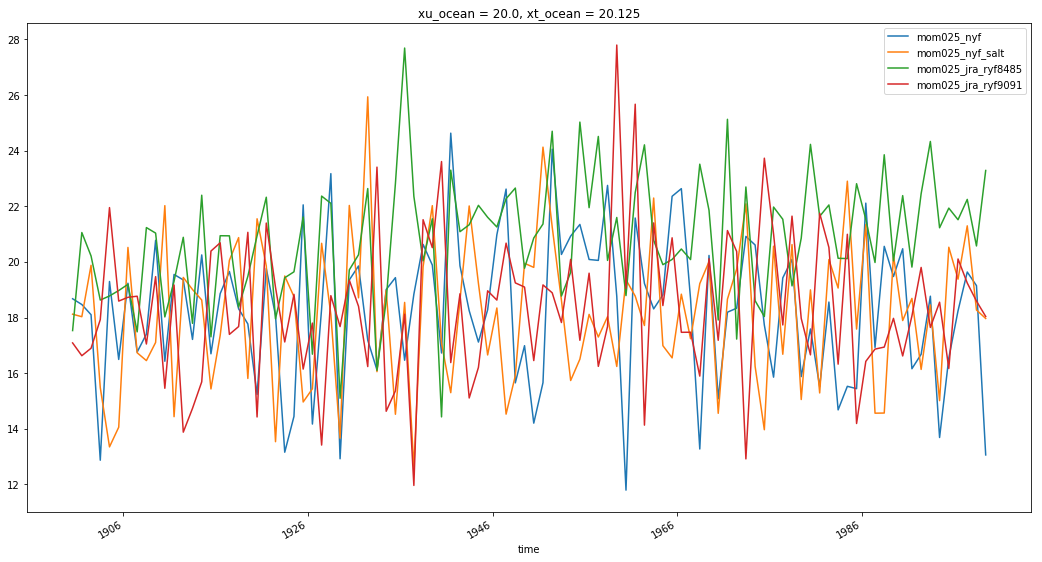

In [21]:
al_rho1 = rho1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho2 = rho2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho3 = rho3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho4 = rho4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
                

al_tx_trans1 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans2 = tx_trans2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans3 = tx_trans3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans4 = tx_trans4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()

#masking the density delvel less than 1026.5 to be 0
al_mask1 = (al_rho1 <= 1026.5)
al_mask2 = (al_rho2 <= 1026.5)
al_mask3 = (al_rho3 <= 1026.5)
al_mask4 = (al_rho4 <= 1026.5)

al_trans1 = (al_tx_trans1 * al_mask1).cumsum('yt_ocean').cumsum('st_ocean')
al_trans2 = (al_tx_trans2 * al_mask2).cumsum('yt_ocean').cumsum('st_ocean')
al_trans3 = (al_tx_trans3 * al_mask3).cumsum('yt_ocean').cumsum('st_ocean')
al_trans4 = (al_tx_trans4 * al_mask4).cumsum('yt_ocean').cumsum('st_ocean')

plt.figure(figsize=(18,10))
al_trans1.max('yt_ocean').max('st_ocean').plot.line(label='mom025_nyf')
al_trans2.max('yt_ocean').max('st_ocean').plot.line(label='mom025_nyf_salt')
al_trans3.max('yt_ocean').max('st_ocean').plot.line(label='mom025_jra_ryf8485')
al_trans4.max('yt_ocean').max('st_ocean').plot.line(label='mom025_jra_ryf9091')
plt.legend(loc=0)